In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [2]:
# 构建单张图片的人脸检测器
def img_face_detector(img_path,face_cascade_file):
    image=cv2.imread(img_path)
    face_cascade=cv2.CascadeClassifier(face_cascade_file)
    if face_cascade.empty(): 
        raise IOError('Unable to load the face cascade classifier xml file!')
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    face_rects=face_cascade.detectMultiScale(gray,1.3,5)
    # 在检测到的脸部周围画矩形框
    for (x,y,w,h) in face_rects:
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),3)
    return image

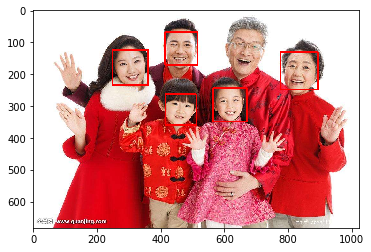

In [3]:
# 测试一下这个人脸检测器：
image1=img_face_detector('E:\PyProjects\DataSet\FireAI/face1.jpg',
                         'E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_frontalface_alt.xml')
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
plt.imshow(image1)

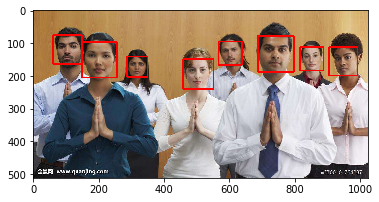

In [4]:
# 测试一下这个人脸检测器：
image2=img_face_detector('E:\PyProjects\DataSet\FireAI/face2.jpg',
                         'E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_frontalface_alt.xml')
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
plt.imshow(image2)


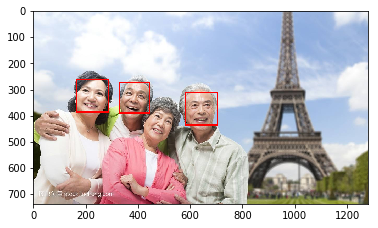

In [5]:
image3=img_face_detector('E:\PyProjects\DataSet\FireAI/face3.jpg',
                         'E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_frontalface_alt.xml')
image3=cv2.cvtColor(image3,cv2.COLOR_BGR2RGB)
plt.imshow(image3)

In [6]:
# 对视频流进行人脸检测
def video_face_detector(face_cascade_file):
    face_cascade=cv2.CascadeClassifier(face_cascade_file)
    if face_cascade.empty(): 
        raise IOError('Unable to load the face cascade classifier xml file!')
    capture=cv2.VideoCapture(0)
    
    while True:
        _,frame=capture.read() # 捕获当前帧
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        face_rects=face_cascade.detectMultiScale(gray,1.3,5)
        # 在检测到的脸部周围画矩形框
        for (x,y,w,h) in face_rects:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
        
        cv2.imshow('Video Face Detector', frame)
        key=cv2.waitKey(1) # 按ESC退出检测
        if key==27:
            break
    capture.release()
    cv2.destroyAllWindows()

In [7]:
video_face_detector('E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_frontalface_alt.xml')
# 运行正常

In [8]:
# 构建单张图片的鼻子检测器
def img_nose_detector(img_path,face_cascade_file,nose_cascade_file,show_face=True):
    image=cv2.imread(img_path)
    face_cascade=cv2.CascadeClassifier(face_cascade_file)
    if face_cascade.empty(): 
        raise IOError('Unable to load the face cascade classifier xml file!')
    nose_cascade=cv2.CascadeClassifier(nose_cascade_file)
    if nose_cascade.empty(): 
        raise IOError('Unable to load the nose cascade classifier xml file!')
        
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    face_rects=face_cascade.detectMultiScale(gray,1.3,5)
    # 在检测到的脸部周围画矩形框
    for (x,y,w,h) in face_rects:
        if show_face: cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),3)
        roi=gray[y:y+h,x:x+w]
        nose_rects=nose_cascade.detectMultiScale(roi,1.3,5)
        for (x_nose,y_nose,w_nose,h_nose) in nose_rects:
            cv2.rectangle(image,(x+x_nose,y+y_nose),(x+x_nose+w_nose,y+y_nose+h_nose),
                         (0,255,0),3)
            break # 一张脸上只能有一个鼻子，故而此处break
    return image

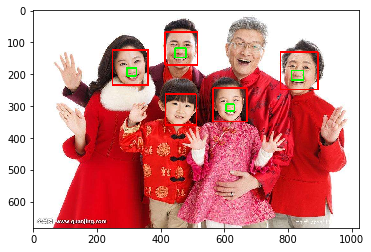

In [9]:
# 测试一下这个鼻子检测器：
image1=img_nose_detector('E:\PyProjects\DataSet\FireAI/face1.jpg',
                         'E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_frontalface_alt.xml',
                         'E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_mcs_nose.xml',
                        True)
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
plt.imshow(image1)

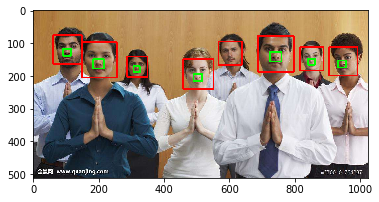

In [10]:
# 测试一下这个鼻子检测器：
image2=img_nose_detector('E:\PyProjects\DataSet\FireAI/face2.jpg',
                         'E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_frontalface_alt.xml',
                         'E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_mcs_nose.xml',
                        True)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
plt.imshow(image2)

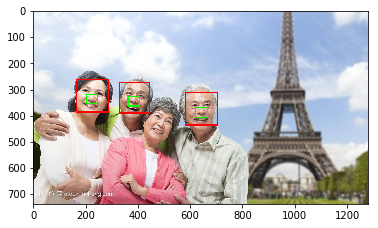

In [11]:
image3=img_nose_detector('E:\PyProjects\DataSet\FireAI/face3.jpg',
                         'E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_frontalface_alt.xml',
                         'E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_mcs_nose.xml',
                        True)
image3=cv2.cvtColor(image3,cv2.COLOR_BGR2RGB)
plt.imshow(image3)

In [12]:
# 对视频流进行鼻子检测
def video_nose_detector(face_cascade_file,nose_cascade_file):
    face_cascade=cv2.CascadeClassifier(face_cascade_file)
    if face_cascade.empty(): 
        raise IOError('Unable to load the face cascade classifier xml file!')
    nose_cascade=cv2.CascadeClassifier(nose_cascade_file)
    if nose_cascade.empty(): 
        raise IOError('Unable to load the nose cascade classifier xml file!')
        
    capture=cv2.VideoCapture(0)
    
    while True:
        _,frame=capture.read() # 捕获当前帧
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        face_rects=face_cascade.detectMultiScale(gray,1.3,5)
        # 在检测到的脸部周围画矩形框
        for (x,y,w,h) in face_rects:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
            roi=gray[y:y+h,x:x+w]
            nose_rects=nose_cascade.detectMultiScale(roi,1.3,5)
            for (x_nose,y_nose,w_nose,h_nose) in nose_rects:
                cv2.rectangle(frame,(x+x_nose,y+y_nose),(x+x_nose+w_nose,y+y_nose+h_nose),
                             (0,255,0),3)
                break # 一张脸上只能有一个鼻子，故而此处break
        cv2.imshow('Video Face Detector', frame)
        key=cv2.waitKey(1) # 按ESC退出检测
        if key==27:
            break
    capture.release()
    cv2.destroyAllWindows()

In [13]:
video_nose_detector('E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_frontalface_alt.xml',
                     'E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_mcs_nose.xml')
# 运行正常

In [14]:
# 构建单张图片的眼睛检测器
def img_eye_detector(img_path,face_cascade_file,eye_cascade_file,show_face=True):
    image=cv2.imread(img_path)
    face_cascade=cv2.CascadeClassifier(face_cascade_file)
    if face_cascade.empty(): 
        raise IOError('Unable to load the face cascade classifier xml file!')
    eye_cascade=cv2.CascadeClassifier(eye_cascade_file)
    if eye_cascade.empty(): 
        raise IOError('Unable to load the eye cascade classifier xml file!')
        
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    face_rects=face_cascade.detectMultiScale(gray,1.3,5)
    # 在检测到的脸部周围画矩形框
    for (x,y,w,h) in face_rects:
        if show_face: cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),3)
        roi=gray[y:y+h,x:x+w]
        eye_rects=eye_cascade.detectMultiScale(roi)
        for (x_,y_,w_,h_) in eye_rects:
            cv2.rectangle(image,(x+x_,y+y_),(x+x_+w_,y+y_+h_),
                         (255,0,0),2)
    return image

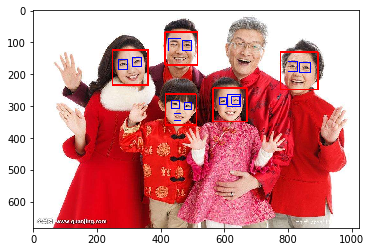

In [15]:
# 测试一下这个眼睛检测器：
image1=img_eye_detector('E:\PyProjects\DataSet\FireAI/face1.jpg',
                         'E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_frontalface_alt.xml',
                         'E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_eye.xml',
                        True)
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
plt.imshow(image1)

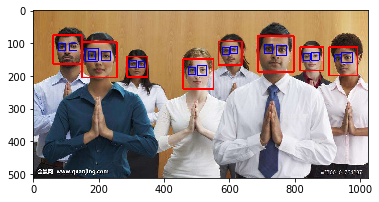

In [16]:
image2=img_eye_detector('E:\PyProjects\DataSet\FireAI/face2.jpg',
                         'E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_frontalface_alt.xml',
                         'E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_eye.xml',
                        True)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
plt.imshow(image2)

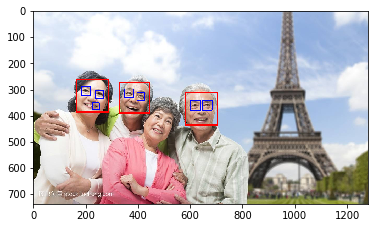

In [17]:
image3=img_eye_detector('E:\PyProjects\DataSet\FireAI/face3.jpg',
                         'E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_frontalface_alt.xml',
                         'E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_eye.xml',
                        True)
image3=cv2.cvtColor(image3,cv2.COLOR_BGR2RGB)
plt.imshow(image3)

In [18]:
# 对视频流进行眼睛检测
def video_eye_detector(face_cascade_file,eye_cascade_file):
    face_cascade=cv2.CascadeClassifier(face_cascade_file)
    if face_cascade.empty(): 
        raise IOError('Unable to load the face cascade classifier xml file!')
    eye_cascade=cv2.CascadeClassifier(eye_cascade_file)
    if eye_cascade.empty(): 
        raise IOError('Unable to load the eye cascade classifier xml file!')
        
    capture=cv2.VideoCapture(0)
    
    while True:
        _,frame=capture.read() # 捕获当前帧
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        face_rects=face_cascade.detectMultiScale(gray,1.3,5)
        # 在检测到的脸部周围画矩形框
        for (x,y,w,h) in face_rects:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
            roi=gray[y:y+h,x:x+w]
            eye_rects=eye_cascade.detectMultiScale(roi)
            for (x_,y_,w_,h_) in eye_rects:
                cv2.rectangle(frame,(x+x_,y+y_),(x+x_+w_,y+y_+h_),
                             (255,0,0),2)
        cv2.imshow('Video Face Detector', frame)
        key=cv2.waitKey(1) # 按ESC退出检测
        if key==27:
            break
    capture.release()
    cv2.destroyAllWindows()

In [19]:
video_nose_detector('E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_frontalface_alt.xml',
                     'E:\PyProjects\DataSet\FireAI\cascade_files/haarcascade_eye.xml')
# 运行正常